# Problem 1

If we list all the natural numbers below 10 that are multiples of 3 or 5, we get 3, 5, 6 and 9. The sum of these multiples is 23.

Find the sum of all the multiples of 3 or 5 below 1000.

In [19]:
def sum_3_5_mult(num):
	mult = []
	for n in range(num):
		if n % 3 == 0 or n % 5 == 0:
			mult.append(n)
	return sum(mult)


n = 1000
print(sum_3_5_mult(n))

233168


# Problem 2

Each new term in the Fibonacci sequence is generated by adding the previous two terms. By starting with 1 and 2, the first 10 terms will be:

1, 2, 3, 5, 8, 13, 21, 34, 55, 89, ...

By considering the terms in the Fibonacci sequence whose values do not exceed four million, find the sum of the even-valued terms.

In [20]:
def create_fib_list(n):
	#Create a list of fib numbers with the highest value < n
	fib = [1, 2]
	add_next = fib[-1]+fib[-2]
	while add_next < n-1:
		add_next = fib[-1]+fib[-2]
		fib.append(add_next)
	#print(fib)
	return fib

def sum_even(num_list):
	total = 0
	for n in num_list:
		if n % 2 == 0:
			total += n
	return total
	
n = 4000000
print(sum_even(create_fib_list(n)))

4613732


# Problem 3

The sum of the squares of the first ten natural numbers is,

1<sup>2</sup> + 2<sup>2</sup> + ... + 10<sup>2</sup> = 385
The square of the sum of the first ten natural numbers is,

(1 + 2 + ... + 10)<sup>2</sup> = 55<sup>2</sup> = 3025
Hence the difference between the sum of the squares of the first ten natural numbers and the square of the sum is 3025 − 385 = 2640.

Find the difference between the sum of the squares of the first one hundred natural numbers and the square of the sum.

In [21]:
def square_diff(n):
    #find the difference between the sum of squares and square of sums. 
    #note that square of sums is larger
    num = list(range(1,n+1))
    sum_of_squares = 0
    for i in num:
        sum_of_squares += i**2
        
    square_of_sums = sum(num)**2
    
    return square_of_sums - sum_of_squares
    
    
square_diff(100)

25164150

# Problem 4

By listing the first six prime numbers: 2, 3, 5, 7, 11, and 13, we can see that the 6th prime is 13.

What is the 10 001st prime number?

In [22]:
#https://codereview.stackexchange.com/questions/185219/finding-nth-prime-using-python-and-sieve-of-eratosthenes
from math import log, ceil

def prime_list(limit):
	#Implement Sieve of Erathosthenes
	#https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes
	nums = [True] * (limit + 1) #Create a list of "True" items corresponding to the first "limit" integers.  
	nums[0] = nums[1] = False #0 and 1 are not prime numbers. 

	for (i, is_prime) in enumerate(nums):
		if is_prime:
			yield i #If the i'th number is prime, yield that number to the returned list. 
			for n in range(i * i, limit + 1, i): 
				nums[n] = False 
				#Sift out all multiples of i, as those can never be prime. 
				#All numbers less than i**2 have already been checked. 

def upper_bound_for_nth_prime(n):
	#for any prime above the 5th prime, there exists an upper bound to n'th prime number given by this formula
		#n = 5 evaluates to 10.4266, but the n'th prime is 11.
	#https://math.stackexchange.com/questions/1270814/bounds-for-n-th-prime
	
	if n < 6:
		return 12
	return ceil(n * (log(n) + log(log(n))))

def find_n_prime(n):
	primes = list(prime_list(upper_bound_for_nth_prime(n)))
	return primes[n - 1] #The first prime (2) is stored in the zero'th index

print(find_n_prime(10001))

104743


# Problem 5

A Pythagorean triplet is a set of three natural numbers, a < b < c, for which,

a<sup>2</sup> + b<sup>2</sup> = c<sup>2</sup>
For example, 3<sup>2</sup> + 4<sup>2</sup> = 9 + 16 = 25 = 5<sup>2</sup>.

There exists exactly one Pythagorean triplet for which a + b + c = 1000.
Find the product abc.

In [23]:
from math import ceil
def find_trip_sum(total):
    for a in range(1,ceil(total/3)):
        for b in range(a+1,ceil(total/2)):
            c = total - a - b
            if a*a + b*b == c*c:
                return a, b, c

total = 1000
a,b,c = find_trip_sum(total)
print("The three primes that add to {sum} are {a}, {b}, and {c}.".format(sum=total, a=a, b=b, c=c))
print("The sum of a, b, and c is {}".format(a*b*c))

The three primes that add to 1000 are 200, 375, and 425.
The sum of a, b, and c is 31875000


# Problem 6

Generate some random numbers (from any one of the sitributions in numpy.random) and make a histogram of them. 

How many samples do you need before your lab partner can tell which one of the distributions you picked?

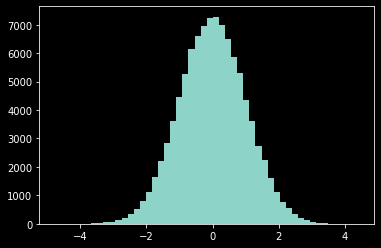

In [24]:
from numpy import histogram
from numpy import random as nprandom
from matplotlib import pyplot
def gen_random_list(n, mean=0, width=1):
    gaussian_random_list = []
    for i in range(0,n):
        gaussian_random_list.append(nprandom.normal(mean,width))
    return gaussian_random_list

sample_size = 100000
bins = 50
pyplot.hist(gen_random_list(sample_size), bins)
pyplot.show()



# Problem 7

Generate a few thousand normally-distributed random numbers in secret, with some known-only-to-you values for the mean and width of the Gaussian. Use numpy.savetxt() to trade files with your lab partner. Then use numpy.loadtxt() to load your partner's file. 

Can you determine the values of the parameters they used? If you have time, see how the accuracy of these estimates change with the number of data points (samples). 

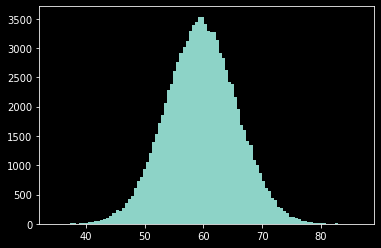

The seed mean is 59.63200603479257
The seed standard deviation is 5.987994354110235


In [25]:
#Uses gen_random_list function from above
from random import uniform
from numpy import savetxt, loadtxt

true_mean = uniform(-100,100)
true_width = uniform(0,10)

sample_size = 100000
bins = 100
random_list = gen_random_list(sample_size, true_mean, true_width)
pyplot.hist(random_list, bins)
pyplot.show()

print("The seed mean is {true_mean}".format(true_mean = true_mean))
print("The seed standard deviation is {true_width}".format(true_width = true_width))

savetxt("rand.txt", random_list)

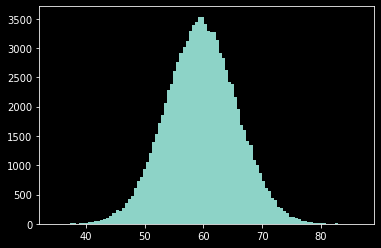

The calculated mean of the imported data set is 59.6323758758767. 
The actual mean is 59.63200603479257
The calculated standard deviation of the imported data set is 5.996974111326924. 
The actual standard deviation is 5.987994354110235
This data set is confident in the true mean to 99.5% with a sample size of about 484.


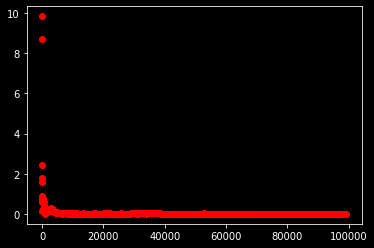

In [26]:
from numpy import mean, std
from math import floor, sqrt

load_data = loadtxt("rand.txt")

pyplot.hist(load_data, bins)
pyplot.show()

data_mean = mean(load_data)
data_std = std(load_data)

print("The calculated mean of the imported data set is {data_mean}. \nThe actual mean is {true_mean}".format(data_mean=data_mean, true_mean = true_mean))
print("The calculated standard deviation of the imported data set is {data_std}. \nThe actual standard deviation is {true_width}".format(data_std = data_std, true_width = true_width))

percent_diff = []
for i in range(1,floor(sqrt(sample_size))):
    imean = mean(load_data[:i**2])
    percent_diff.append(100*abs((imean - true_mean)/true_mean))

pyplot.plot([i**2 for i in list(range(1,len(percent_diff) + 1))], percent_diff, 'ro')
pyplot.show()

sequential_confidence = 0 #Let the mean be convident 5 times before asserting confindence incase the data set happens to choose early accurate values
for n, pdiff in enumerate(percent_diff):
    if pdiff < 0.5:
        sequential_confidence += 1
    else: 
        sequential_confidence = 0

    if sequential_confidence >= 5:
        print("This data set is confident in the true mean to 99.5% with a sample size of about {}.".format((n-4)**2))
        break
    
        